In [1489]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1490]:
# environment arg

scale = 150
learning_rate = 0.001

In [1491]:
# load data and set 總成績 as prediction
# input 10 channel, output 1 channel

df = pd.read_csv('Data.csv') / scale
train_sol = np.array(df['總成績']).T
df = df.drop('總成績', axis=1)
train_in = np.array(df)



In [1492]:
def ReLU(x):
    if x > 0:
        return x
    return 0.1 * x

def dReLU(x):
    if x > 0:
        return 1
    return 0.1

In [1493]:
# initialize nn_weights

np.random.seed(1)

nn_weights1 = 2 * np.random.random((10,1)) - 1
nn_weights2 = 2 * np.random.random((10,1)) - 1
nn_weights3 = 2 * np.random.random((1,1)) - 1
nn_weights4 = 2 * np.random.random((1,1)) - 1

loss = []

# train the network

for i in range(100):
    
    # sigmoid
    train_out1 = ( 1 / (1 + np.exp(-(np.dot(train_in, nn_weights1)))) )
    train_out2 = ( 1 / (1 + np.exp(-(np.dot(train_in, nn_weights2)))) )
    train_add_out = np.dot(train_out1, nn_weights3) + np.dot(train_out2, nn_weights4)
    train_out3 = ( 1 / (1 + np.exp(-train_add_out)) )
    print(train_out3)

    aloss = np.square(np.subtract(train_sol, train_out3.T)).mean()
    loss.append(aloss)
    print(aloss)

    nn_weights3 += np.dot(train_out1.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out)) * learning_rate 
    nn_weights4 += np.dot(train_out2.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out)) * learning_rate 
    nn_weights1 += np.dot(train_in.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out) * nn_weights3 * train_out1 * (1 - train_out1)) * learning_rate 
    nn_weights2 += np.dot(train_in.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out) * nn_weights4 * train_out2 * (1 - train_out2)) * learning_rate 
    
    

    '''# ReLU
    train_out1 = np.dot(train_in, nn_weights1)
    for x in np.nditer(train_out1, op_flags=['readwrite']): 
        x[...] = ReLU(x)
    train_out2 = np.dot(train_out1, nn_weights2)
    for x in np.nditer(train_out2, op_flags=['readwrite']): 
        x[...] = ReLU(x)

    aloss = np.square(np.subtract(train_sol, train_out2.T)).mean()
    loss.append(aloss)
    print(aloss)

    gra_train_out2 = train_out2
    for x in np.nditer(gra_train_out2, op_flags=['readwrite']): 
        x[...] = dReLU(x)
    gra_train_out1 = train_out1
    for x in np.nditer(gra_train_out1, op_flags=['readwrite']): 
        x[...] = dReLU(x)
    nn_weights2 += np.dot(train_out1.T, (train_sol - train_out2.T).T * gra_train_out2) * learning_rate
    nn_weights1 += np.dot(train_in.T, (train_sol - train_out2.T).T * gra_train_out2 * nn_weights2 * gra_train_out1) * learning_rate
    '''
    



[[0.57769938]
 [0.58849134]
 [0.5980277 ]
 [0.59100011]
 [0.57421045]
 [0.57732653]
 [0.59781325]
 [0.61811757]
 [0.59123371]
 [0.5832487 ]
 [0.63195268]
 [0.61288545]
 [0.68338602]
 [0.64029555]]
0.020837357591294788
[[0.57768604]
 [0.58847682]
 [0.59801264]
 [0.59098538]
 [0.57419737]
 [0.57731294]
 [0.59779801]
 [0.61809947]
 [0.59121897]
 [0.58323457]
 [0.63193347]
 [0.61286857]
 [0.68336451]
 [0.64027658]]
0.02083441327744212
[[0.5776727 ]
 [0.5884623 ]
 [0.59799759]
 [0.59097065]
 [0.57418431]
 [0.57729935]
 [0.59778277]
 [0.61808137]
 [0.59120423]
 [0.58322044]
 [0.63191426]
 [0.6128517 ]
 [0.68334299]
 [0.64025762]]
0.020831469804677705
[[0.57765936]
 [0.58844779]
 [0.59798254]
 [0.59095593]
 [0.57417124]
 [0.57728577]
 [0.59776753]
 [0.61806327]
 [0.59118949]
 [0.58320632]
 [0.63189505]
 [0.61283484]
 [0.68332147]
 [0.64023865]]
0.02082852717277068
[[0.57764603]
 [0.58843328]
 [0.59796749]
 [0.59094121]
 [0.57415818]
 [0.57727219]
 [0.5977523 ]
 [0.61804518]
 [0.59117476]
 [0.

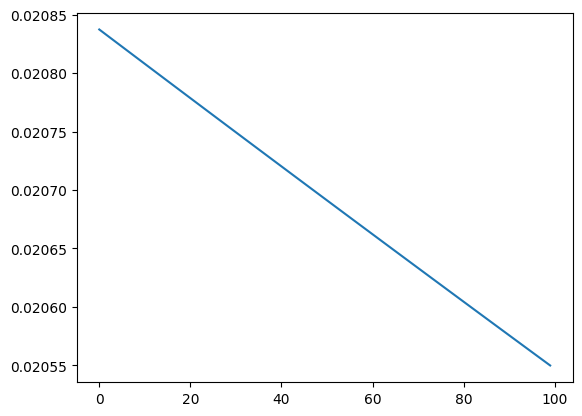

In [1494]:
plt.plot(loss)
plt.show()

In [1495]:
# test

test_in = np.array([11,86,90,93.5,93,90.63,90,99,106,98.33]) / scale
test_out1 = ( 1 / (1 + np.exp(-(np.dot(test_in, nn_weights1)))) )
test_out2 = ( 1 / (1 + np.exp(-(np.dot(test_in, nn_weights2)))) )
test_add_out = np.dot(test_out1, nn_weights3) + np.dot(test_out2, nn_weights4)
test_out3 = ( 1 / (1 + np.exp(-test_add_out)) )
print(test_out3 * scale)
print(np.square(np.subtract(train_sol, test_out3.T)).mean())

[86.45729154]
0.01121028601862638
